# Import the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset - Bank Churn Modelling
#### <font color ='green'> The source data could be in any format like RDBMS, JSON, Excel, CSV, Parquet, HTML etc </font>

In [2]:
churn_data = pd.read_csv('Bank_churn_modelling.csv')

# Check the shape,size and data-type of the dataset

In [3]:
churn_data.shape

(10000, 14)

#### <font color="green"> Top or Bottom N rows, default 5 </font>

In [4]:
# Top N rows, default 5, or for top 10 rows: churn_data.head(10)
churn_data.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Bottom N rows, default 5
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### <font color="green"> Check the data types and not-null values </font>

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### <font color="green"> Drop irrelevant columns </font>
#### <font color="green"> inplace=True makes the changes within the dataframe </font>
#### <font color="green"> axis=1 for Column operation(horizontal) and axis=0 for row operation(vertical) </font>

In [7]:
churn_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True) 

# Check the data distribution, quick stats

In [8]:
# Quick Stats of the data
churn_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Advanced use of Describe Function
churn_data.describe(exclude=np.number)

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [10]:
churn_data.describe(percentiles=[0.01,0.25,0.5,0.75,0.99,1])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
1%,432.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
99%,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000
100%,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# Use of Axis
churn_data.sum(axis=1).head()

0    102015.88
1    197002.44
2    274149.37
3     94567.63
4    205492.92
dtype: float64

In [12]:
churn_data.sum(axis=0)

CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                  7.64859e+08
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                           1.0009e+09
Exited                                                          2037
dtype: object

In [13]:
churn_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
churn_data.Balance.isna().sum()

0

# Use of astype - Type casting in Python

In [16]:
churn_data_copy = churn_data.copy()

In [17]:
churn_data_copy.Exited = churn_data_copy.Exited.astype('float64')

In [18]:
churn_data_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0


In [19]:
churn_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null float64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


# Example of Nonetype usage

In [21]:
churn_data_copy['bal_cat'] = np.where(churn_data_copy['EstimatedSalary']<=10000,'LT10K',None)
churn_data_copy['bal_cat'] = np.where((churn_data_copy['EstimatedSalary']>10000)&(churn_data_copy['EstimatedSalary']<=50000),'LT50K',churn_data_copy['bal_cat'])
churn_data_copy['bal_cat'] = np.where((churn_data_copy['EstimatedSalary']>50000)&(churn_data_copy['EstimatedSalary']<=100000),'LT100K',churn_data_copy['bal_cat'])
churn_data_copy['bal_cat'] = np.where(churn_data_copy['EstimatedSalary']>100000,'GT100K',churn_data_copy['bal_cat'])

In [23]:
churn_data_copy.bal_cat.value_counts()

GT100K    5010
LT100K    2537
LT50K     1945
LT10K      508
Name: bal_cat, dtype: int64

# Aggregation and Manipulating data in Dataframe

## <font color="green"> Group By </font>

In [28]:
churn_data.groupby(['Gender'])['EstimatedSalary','Balance'].agg([min,max,np.mean])

EstimatedSalary                           Balance             \
                   min        max           mean     min        max   
Gender                                                                
Female           91.75  199992.48  100601.541382     0.0  238387.56   
Male             11.58  199953.33   99664.576931     0.0  250898.09   

                      
                mean  
Gender                
Female  75659.369139  
Male    77173.974506

In [31]:
churn_data.groupby(['Geography']).agg({'EstimatedSalary':[min,max,np.mean],
                                       'Balance':[np.mean,np.median],
                                       'Age':[np.mean,np.median]})

EstimatedSalary                                  Balance             \
                      min        max           mean           mean     median   
Geography                                                                       
France              90.07  199929.17   99899.180814   62092.636516   62153.50   
Germany             11.58  199970.74  101113.435102  119730.116134  119703.10   
Spain              417.41  199992.48   99440.572281   61818.147763   61710.44   

                 Age         
                mean median  
Geography                    
France     38.511767     37  
Germany    39.771622     38  
Spain      38.890997     37

In [34]:
# reset_index() will reset the index of the dataframe
churn_data.groupby(['Geography']).agg({'EstimatedSalary':[min,max,np.mean],
                                       'Balance':[np.mean,np.median],
                                       'Age':[np.mean,np.median]}).reset_index()

Geography EstimatedSalary                                  Balance  \
                        min        max           mean           mean   
0    France           90.07  199929.17   99899.180814   62092.636516   
1   Germany           11.58  199970.74  101113.435102  119730.116134   
2     Spain          417.41  199992.48   99440.572281   61818.147763   

                    Age         
      median       mean median  
0   62153.50  38.511767     37  
1  119703.10  39.771622     38  
2   61710.44  38.890997     37

In [42]:
# as_index=False is to make sure the grouing columns are not set as indexes.
churn_data.groupby(['Gender','Geography']).agg({'EstimatedSalary':[min,max,np.mean],
                                       'Balance':[np.mean,np.median],
                                       'Age':[np.mean,np.median]})

EstimatedSalary                                  Balance  \
                             min        max           mean           mean   
Gender Geography                                                            
Female France             178.19  199862.75   99564.252755   60322.670159   
       Germany             91.75  199970.74  102446.424124  119145.966471   
       Spain              479.54  199992.48  100734.107475   59862.092534   
Male   France              90.07  199929.17  100174.252495   63546.284875   
       Germany             11.58  199693.84   99905.033959  120259.668222   
       Spain              417.41  199953.33   98425.687680   63352.833746   

                                    Age         
                      median       mean median  
Gender Geography                                
Female France      47536.400  38.773994     37  
       Germany    118907.600  40.154233     39  
       Spain           0.000  39.199265     38  
Male   France      69413.440  38.296404     37  
       Germany    120120.490  39.424772     38  
       Spain       69857.005  38.649135     37

## <font color="green"> Crosstab & Pivot Table </font>

In [157]:
churn_data.pivot_table(values=['CreditScore','NumOfProducts'],index=['Gender','Geography'],aggfunc='mean')

CreditScore  NumOfProducts
Gender Geography                            
Female France      649.185759       1.547545
       Germany     653.093881       1.511316
       Spain       651.769513       1.573003
Male   France      650.064657       1.517254
       Germany     649.966565       1.527356
       Spain       650.992075       1.512968

In [158]:
churn_data.pivot_table(values=['CreditScore','NumOfProducts'],index=['Geography'],columns=['Gender'],aggfunc='mean')

CreditScore             NumOfProducts          
Gender         Female        Male        Female      Male
Geography                                                
France     649.185759  650.064657      1.547545  1.517254
Germany    653.093881  649.966565      1.511316  1.527356
Spain      651.769513  650.992075      1.573003  1.512968

In [159]:
churn_data.pivot_table(values=['IsActiveMember','HasCrCard','Exited'],index=['Geography'],columns=['Gender'],aggfunc='sum')

Exited      HasCrCard       IsActiveMember      
Gender    Female Male    Female  Male         Female  Male
Geography                                                 
France       460  350      1578  1965           1162  1429
Germany      448  366       843   948            559   689
Spain        231  182       771   950            563   749

## <font color="green"> Slicing Dataframe, Sorting, Removing Duplicate, Missing Value Treatment </font>

In [59]:
churn_data_copy[['Age','CreditScore']].head()

,Age,CreditScore
0,42,619
1,41,608
2,42,502
3,39,699
4,43,850


In [82]:
# Different ways to slice data
#churn_data_copy.iloc[0:3]
#churn_data_copy.iloc[[0,3]]
churn_data_copy.iloc[0:5,[3,0]]

,Age,CreditScore
0,42,619
1,41,608
2,42,502
3,39,699
4,43,850


In [87]:
churn_data_copy.sort_values(by=['Age','Balance'],ascending=[True,False]).head(20) #inplace=True will make the changes in the DataFrame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_cat
3686,706,France,Male,18,2,176139.50,2,1,0,129654.22,0.0,GT100K
746,844,France,Male,18,2,160980.03,1,0,0,145936.28,0.0,GT100K
1619,656,France,Male,18,10,151762.74,1,0,1,127014.32,0.0,GT100K
9501,835,Germany,Male,18,2,142872.36,1,1,1,117632.63,0.0,GT100K
9932,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0.0,GT100K
2136,727,France,Male,18,4,133550.67,1,1,1,46941.41,0.0,LT50K
9029,594,Germany,Male,18,1,132694.73,1,1,0,167689.56,0.0,GT100K
2021,716,Germany,Female,18,3,128743.80,1,0,0,197322.13,0.0,GT100K
9526,642,Germany,Male,18,5,111183.53,2,0,1,10063.75,0.0,LT50K
9782,509,France,Male,18,7,102983.91,1,1,0,171770.58,0.0,GT100K


In [97]:
# Drop Duplicate records from a DataFrame
churn_data_copy.drop_duplicates(['CreditScore','Age'],keep='first').shape

(6778, 12)

In [98]:
churn_data_copy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'bal_cat'],
      dtype='object')

In [99]:
churn_data_copy.columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                           'Exited', 'balance_category']

In [104]:
churn_data_copy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'balance_category'],
      dtype='object')

In [ ]:
# Missing Value Treatment
#churn_data_copy.Balance.fillna(churn_data_copy.Balance.median())
churn_data_copy.Geography.fillna(churn_data_copy.Geography.mode())

# Visualization

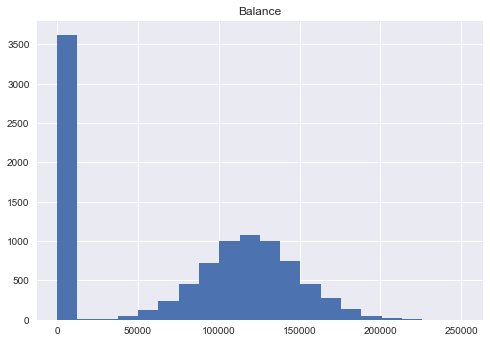

In [121]:
churn_data.hist('Balance',bins=(20))
plt.show()

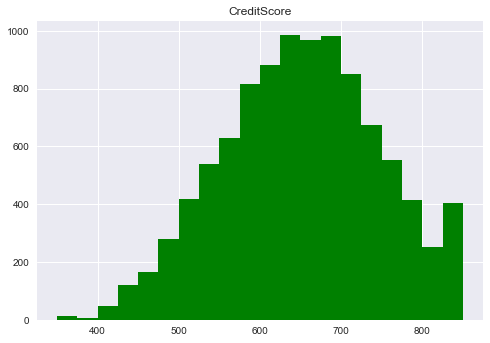

In [123]:
churn_data.hist('CreditScore',bins=(20),color='green')
plt.show()

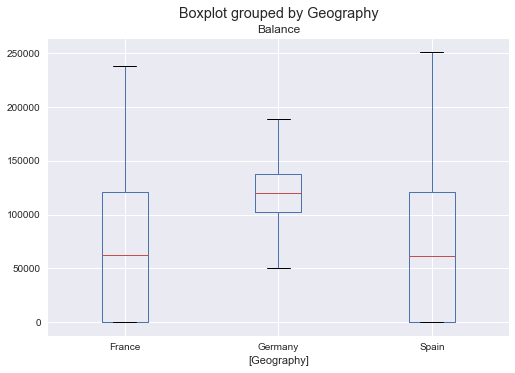

In [126]:
churn_data.boxplot(column=['Balance'],by=['Geography'])
plt.show()

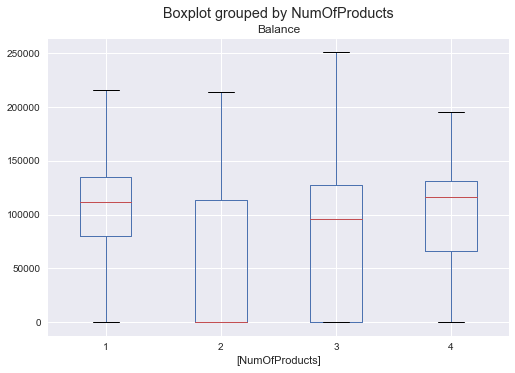

In [131]:
churn_data.boxplot(column=['Balance'],by=['NumOfProducts'])
plt.show()

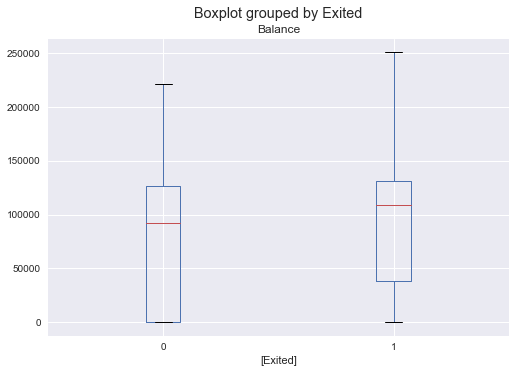

In [134]:
churn_data.boxplot(column=['Balance'],by=['Exited'])
plt.show()

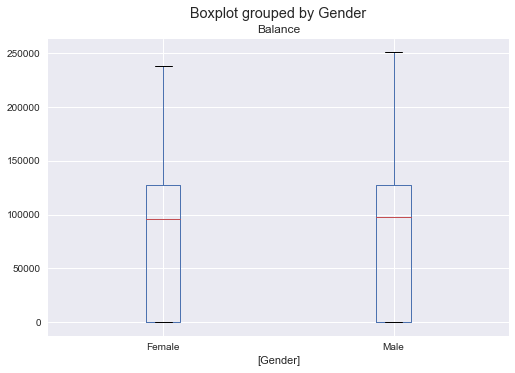

In [160]:
churn_data.boxplot(column=['Balance'],by=['Gender'])
plt.show()

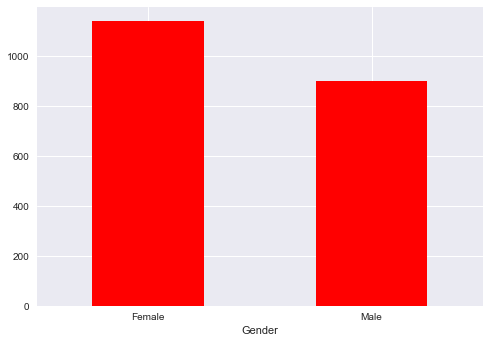

In [148]:
churn_data.groupby(['Gender'])['Exited'].sum().plot.bar(rot=0,color='red')
plt.show()

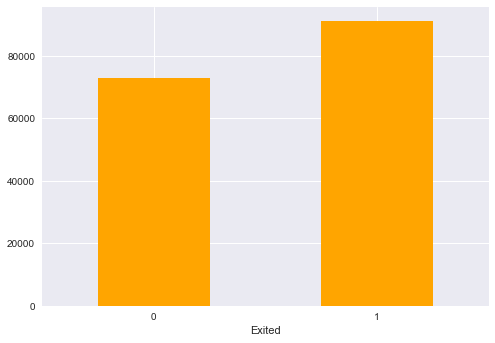

In [149]:
churn_data.groupby(['Exited'])['Balance'].mean().plot.bar(rot=0,color='orange')
plt.show()

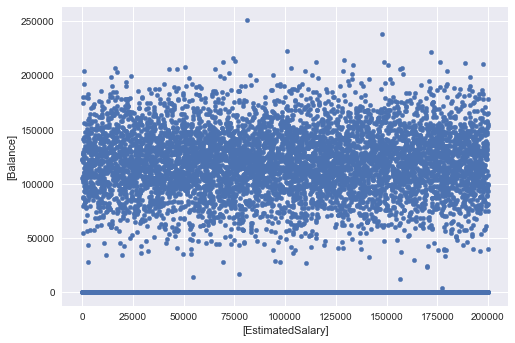

In [165]:
churn_data.plot.scatter(x=['EstimatedSalary'],y=['Balance'])
plt.show()

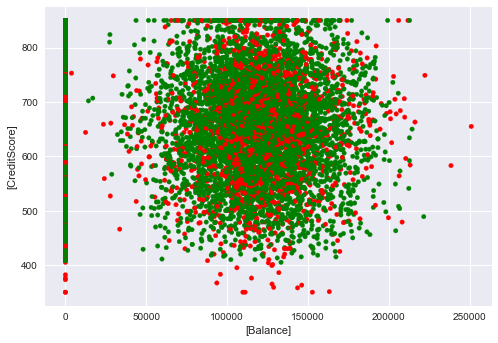

In [184]:
colors = {0:'green',1:'red'}
churn_data.plot.scatter(x=['Balance'],y=['CreditScore'],c=churn_data['Exited'].apply(lambda x:colors[x]))
plt.show()

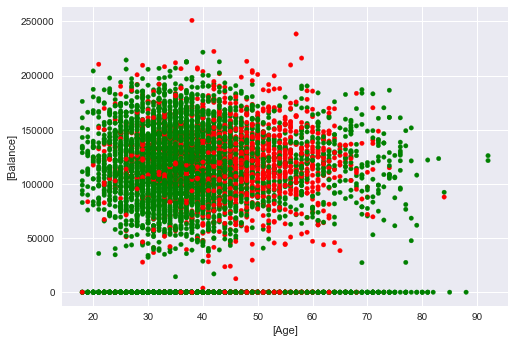

In [186]:
colors = {0:'green',1:'red'}
churn_data.plot.scatter(x=['Age'],y=['Balance'],c=churn_data['Exited'].apply(lambda x:colors[x]))
plt.show()

In [199]:
churn_data[['Age','Tenure','Balance','EstimatedSalary','Exited']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Tenure,Balance,EstimatedSalary,Exited
Age,1,-0.01,0.028,-0.0072,0.29
Tenure,-0.01,1,-0.012,0.0078,-0.014
Balance,0.028,-0.012,1,0.013,0.12
EstimatedSalary,-0.0072,0.0078,0.013,1,0.012
Exited,0.29,-0.014,0.12,0.012,1


# Sampling

In [192]:
from sklearn.model_selection import train_test_split

In [194]:
train,test = train_test_split(churn_data, test_size=0.3, random_state=5, stratify=churn_data['Exited'])

In [195]:
train.shape, test.shape

((7000, 11), (3000, 11))

In [196]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.868714,38.958714,5.015714,75808.864241,1.53600,0.706571,0.512000,100522.096211,0.203714
std,96.971863,10.466973,2.882127,62322.976011,0.58055,0.455366,0.499892,57344.206045,0.402788
min,350.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.000000,90.070000,0.000000
25%,583.000000,32.000000,3.000000,0.000000,1.00000,0.000000,0.000000,51671.765000,0.000000
50%,651.000000,37.000000,5.000000,96378.380000,1.00000,1.000000,1.000000,100996.805000,0.000000
75%,717.000000,44.000000,7.000000,127434.225000,2.00000,1.000000,1.000000,149541.820000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.00000,1.000000,1.000000,199992.480000,1.000000


In [197]:
test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,652.06900,38.835667,5.006000,78065.614397,1.516667,0.703000,0.522333,99082.575110,0.203667
std,95.90429,10.537505,2.915956,62552.635976,0.584097,0.457013,0.499584,57893.704295,0.402791
min,350.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,585.00000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,49676.410000,0.000000
50%,653.00000,37.000000,5.000000,99233.265000,1.000000,1.000000,1.000000,97889.865000,0.000000
75%,718.00000,44.000000,8.000000,128268.152500,2.000000,1.000000,1.000000,149006.047500,0.000000
max,850.00000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000
